In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 特征详情

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train.describe(percentiles=[0.00, 0.25, 0.5, 0.75, 1.00])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
0%,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
100%,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 特征分析

In [7]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
train_corr = train.drop('PassengerId',axis=1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


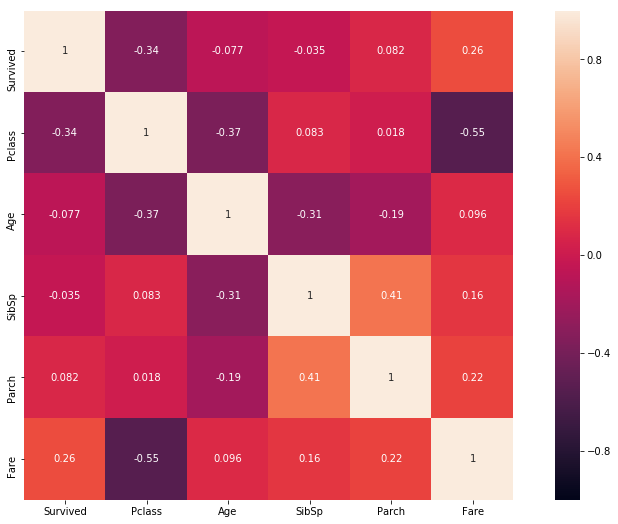

In [9]:
a = plt.subplots(figsize=(15, 9))#调整画布大小
a = sns.heatmap(train_corr, vmin=-1, vmax=1, annot=True, square=True)#画热力图

- ① Pclass,乘客等级,1是最高级

结果分析:可以看出Survived和Pclass在Pclass=1的时候有较强的相关性（>0.5），所以最终模型中包含该特征。

In [10]:
train.groupby(['Pclass'])['Pclass','Survived'].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


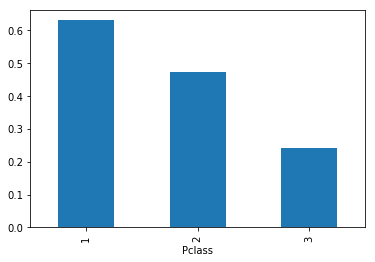

In [11]:
train.groupby(['Pclass'])['Survived'].mean().plot.bar()

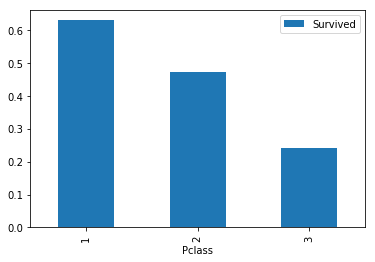

In [12]:
train[['Pclass','Survived']].groupby('Pclass').mean().plot.bar()

- ② Sex,性别

结果分析:女性有更高的活下来的概率（74%）,保留该特征

In [13]:
train.groupby(['Sex'])['Sex','Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


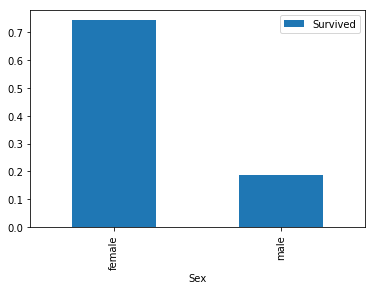

In [14]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

- ③ SibSp and Parch 兄妹配偶数/父母子女数

结果分析:这些特征与特定的值没有相关性不明显，最好是由这些独立的特征派生出一个新特征或者一组新特征

In [15]:
train[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


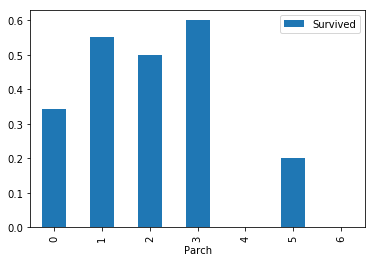

In [16]:
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar()

- ④ Age年龄与生存情况的分析.

结果分析:由图,可以看到年龄是影响生存情况的.

但是年龄是有大部分缺失值的,缺失值需要进行处理,可以使用填充或者模型预测.

In [17]:
plt.hist

<function matplotlib.pyplot.hist>

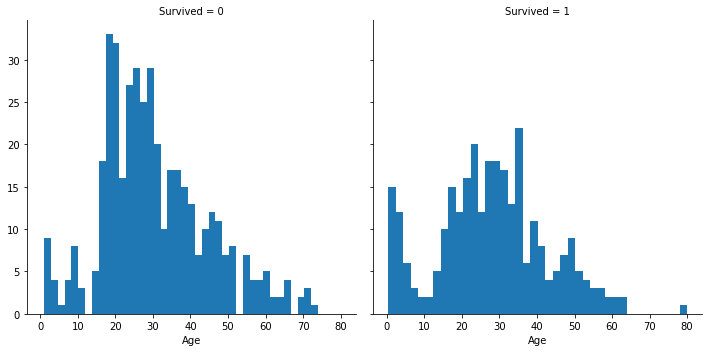

In [18]:
g = sns.FacetGrid(train, col='Survived', size=5)
g.map(plt.hist, 'Age', bins=40)

##### test

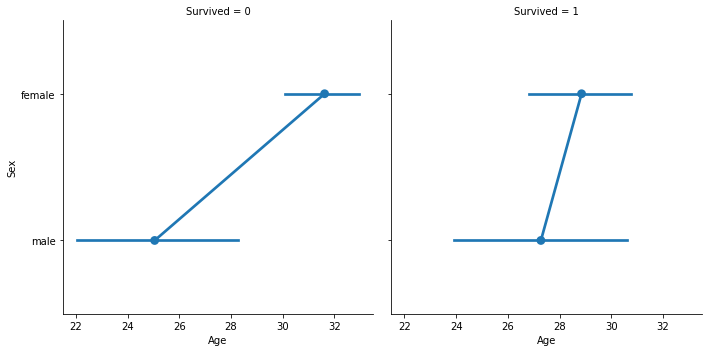

In [19]:
g = sns.FacetGrid(train, col='Survived', size=5)
g.map(sns.pointplot, 'Age','Sex')

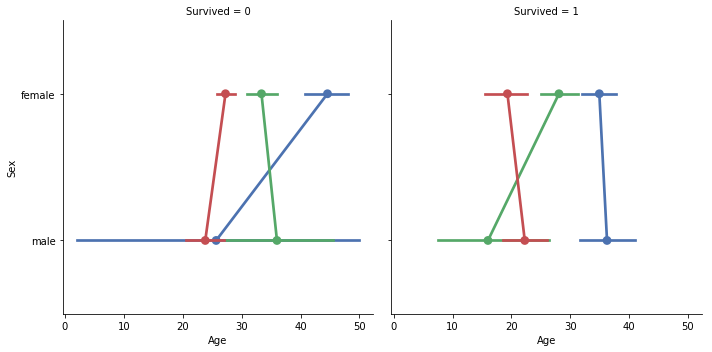

In [20]:
g = sns.FacetGrid(train, col='Survived', size=5)
g.map(sns.pointplot, 'Age','Sex','Pclass', ci=95.0, palette = 'deep')

##### test over

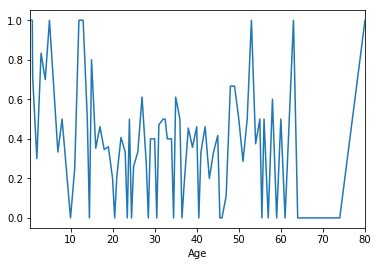

In [21]:
train.groupby(['Age'])['Survived'].mean().plot()

- ⑤ Embarked登港港口与生存情况的分析

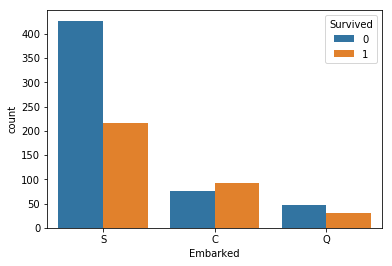

In [22]:
sns.countplot('Embarked', hue='Survived', data=train)

- ⑥ 其他因素


在数据的Name项中包含了对该乘客的称呼，如Mr、Miss等，这些信息包含了乘客的年龄、性别、也有可能包含社会地位，如Dr、Lady、Major、Master等称呼。这一项不方便用图表展示，但是在特征工程中，我们会将其提取出来,然后放到模型中。

剩余因素还有船票价格、船舱号和船票号，这三个因素都可能会影响乘客在船中的位置从而影响逃生顺序，但是因为这三个因素与生存之间看不出明显规律，所以在后期模型融合时，将这些因素交给模型来决定其重要性。

# 二.特征工程

In [23]:
#先将数据集合并,一起做特征工程(注意,标准化的时候需要分开处理)
#先将test补齐,然后通过pd.apped()合并
test['Survived'] = 0
train_test = train.append(test)

## 特征处理

- ① Pclass,乘客等级,1是最高级

两种方式:一是该特征不做处理,可以直接保留.二是再处理:也进行分列处理(比较那种方式模型效果更好,就选那种)

In [24]:
train_test = pd.get_dummies(train_test, columns=['Pclass'])

- ② Sex,性别 无缺失值,直接分列

In [25]:
train_test = pd.get_dummies(train_test, columns=['Sex'])

- ③ SibSp and Parch 兄妹配偶数/父母子女数

第一次直接保留:这两个都影响生存率,且都是数值型,先直接保存.

第二次进行两项求和,并进行分列处理.(兄妹配偶数和父母子女数都是认识人的数量,所以总数可能也会更好)(模型结果提高到了)

In [26]:
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']

In [27]:
train_test = pd.get_dummies(train_test, columns = ['SibSp','Parch', 'SibSp_Parch'])

- ④ Embarked 数据有极少量(3个)缺失值,但是在分列的时候,缺失值的所有列可以均为0,所以可以考虑不填充.

另外,也可以考虑用测试集众数来填充.先找出众数,再采用df.fillna()方法

In [28]:
train_test.loc[train_test["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,...,Parch_9,SibSp_Parch_0,SibSp_Parch_1,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,SibSp_Parch_6,SibSp_Parch_7,SibSp_Parch_10
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",62,1,113572,1,0,...,0,1,0,0,0,0,0,0,0,0
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",830,1,113572,1,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
train_test = pd.get_dummies(train_test, columns=['Embarked'])

In [30]:
train_test.loc[train_test["Embarked_S"].isnull()]

,Age,Cabin,Fare,Name,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,...,SibSp_Parch_2,SibSp_Parch_3,SibSp_Parch_4,SibSp_Parch_5,SibSp_Parch_6,SibSp_Parch_7,SibSp_Parch_10,Embarked_C,Embarked_Q,Embarked_S


- ⑤ Name
1.在数据的Name项中包含了对该乘客的称呼,将这些关键词提取出来,然后做分列处理.(参考别人的)

In [31]:
#从名字中提取出称呼： df['Name].str.extract()是提取函数,配合正则一起使用
train_test['Name1'] = train_test['Name'].str.extract('.+,(.+)', expand=False).str.extract('^(.+?)\.', expand=False).str.strip()

In [32]:
#将姓名分类处理()
train_test['Name1'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer' , inplace = True)
train_test['Name1'].replace(['Jonkheer', 'Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty' , inplace = True)
train_test['Name1'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
train_test['Name1'].replace(['Mlle', 'Miss'], 'Miss')
train_test['Name1'].replace(['Mr'], 'Mr' , inplace = True)
train_test['Name1'].replace(['Master'], 'Master' , inplace = True)

##### test

In [33]:
train_test[['Name1','Survived']].groupby(['Name1']).mean().head()

,Survived
Name1,
Master,0.377049
Miss,0.488462
Mlle,1.000000
Mme,1.000000
Mr,0.107001


##### test_over

#### 为什么这里Mlle和Mme不用inplace=True去掉。。。？

In [34]:
train_test['Name1'].replace(['Mme','Ms','Mrs'], 'Mrs', inplace=True)
train_test['Name1'].replace(['Mlle','Miss'], 'Miss', inplace=True)

#### 我认为该去，去了···

In [35]:
#分列处理
train_test = pd.get_dummies(train_test, columns=['Name1'])

#### 2.从姓名中提取出姓做特征

In [36]:
#从姓名中提取姓
train_test['Name2'] = train_test['Name'].apply(lambda x: x.split('.')[1])

#计算数量，然后合并数据集1
Name2_sum = train_test['Name2'].value_counts()
Name2_sum

 John                                                   15
 William                                                11
 Patrick                                                10
 James                                                   9
 Mary                                                    7
 Joseph                                                  7
 William Henry                                           6
 Ivan                                                    6
 Kate                                                    5
 Samuel                                                  5
 Harry                                                   5
 William John                                            4
 Albert                                                  4
 Martin                                                  4
 Tannous                                                 4
 Edward                                                  4
 George                                                 

In [37]:
#计算数量，然后合并数据集2
Name2_sum = Name2_sum.reset_index()
Name2_sum

,index,Name2
0,John,15
1,William,11
2,Patrick,10
3,James,9
4,Mary,7
5,Joseph,7
6,William Henry,6
7,Ivan,6
8,Kate,5
9,Samuel,5


In [38]:
Name2_sum.columns=['Name2','Name2_sum']
train_test = pd.merge(train_test, Name2_sum, how='left', on='Name2')

In [39]:
#由于出现一次时该特征时无效特征,用one来代替出现一次的姓
train_test.loc[train_test['Name2_sum'] == 1, 'Name2_new'] = 'one'
train_test.loc[train_test['Name2_sum'] > 1, 'Name2_new'] = train_test['Name2']
del train_test['Name2']

In [40]:
#分列处理
train_test = pd.get_dummies(train_test, columns=['Name2_new'])

In [41]:
#删除掉姓名这个特征
del train_test['Name']

In [42]:
train_test.head()

,Age,Cabin,Fare,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
0,22.0,NaN,7.2500,1,0,A/5 21171,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,C85,71.2833,2,1,PC 17599,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,26.0,NaN,7.9250,3,1,STON/O2. 3101282,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,35.0,C123,53.1000,4,1,113803,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,35.0,NaN,8.0500,5,0,373450,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


- ⑥ Fare票价

该特征有缺失值,先找出缺失值的那调数据,然后用平均数填充

In [43]:
#从上面的分析,发现该特征train集无miss值,test有一个缺失值,先查看
train_test.loc[train_test['Fare'].isnull()]

,Age,Cabin,Fare,PassengerId,Survived,Ticket,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
1043,60.5,NaN,NaN,1044,0,3701,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#票价与pclass和Embarked有关，所以用train分组后的平均数填充
train.groupby(by=["Pclass","Embarked"]).Fare.mean()

Pclass  Embarked
1       C           104.718529
        Q            90.000000
        S            70.364862
2       C            25.358335
        Q            12.350000
        S            20.327439
3       C            11.214083
        Q            11.183393
        S            14.644083
Name: Fare, dtype: float64

In [45]:
#用pclass=3和Embarked=S的平均数14.644083来填充
train_test['Fare'].fillna(14.43522, inplace=True)

- ⑦ Ticket

该列和名字做类似的处理，先提取，然后分列

In [46]:
#将Ticket提取字符列
#str.isnumeric(), 如果S中只有数字字符，则返回True，否则返回False
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket', inplace=True, axis=1)

In [47]:
#分列，此时nan值可以不作处理
train_test = pd.get_dummies(train_test, columns=['Ticket_Letter'],drop_first=True)
#drop_first=True,删除Ticket_letter的分好后的第一个特征

In [48]:
train_test.head()

,Age,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_SOTON/O2,Ticket_Letter_SOTON/OQ,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P
0,22.0,NaN,7.2500,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,38.0,C85,71.2833,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,NaN,7.9250,3,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
3,35.0,C123,53.1000,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,NaN,8.0500,5,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


- ⑧ Age

1.该列有大量缺失值,考虑用一个回归模型进行填充.<br>
2.在模型修改的时候,考虑到年龄缺失值可能影响死亡情况,用年龄是否缺失值来构造新特征

In [49]:
"""这是模型就好后回来增加的新特征
考虑年龄缺失值可能影响死亡情况,数据表明,年龄缺失的死亡率为0.19."""
train_test.loc[train_test['Age'].isnull()]['Survived'].mean()

0.19771863117870722

In [50]:
#所以用年龄是否缺失来构造新特征
train_test.loc[train_test['Age'].isnull(), 'age_nan'] = 1
train_test.loc[train_test['Age'].notnull(), 'age_nan'] = 0
train_test = pd.get_dummies(train_test, columns=['age_nan'])

#### 利用其他组特征量，采用机器学习算法来预测Age

In [51]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Columns: 184 entries, Age to age_nan_1.0
dtypes: float64(2), int64(3), object(1), uint8(178)
memory usage: 339.1+ KB


In [52]:
#创建没有【‘Age’，‘Survived’】的数据集
missing_age = train_test.drop(['Survived','Cabin'], axis=1)
#将Age完整的项作为训练集、将Age缺失的项作为测试集
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]

In [53]:
#构建训练集和预测集的X和Y值
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

In [54]:
#先将数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用测试集训练并标准化
ss.fit(missing_age_X_train)
missing_age_train = ss.transform(missing_age_X_train)
missing_age_test = ss.transform(missing_age_X_test)

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [55]:
#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge(verbose=True)

In [56]:
lin.fit(missing_age_X_train, missing_age_Y_train)

Convergence after  13  iterations


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=True)

In [57]:
#利用loc将预测值填入数据集
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

In [58]:
train_test[train_test['Age'].isnull()].head()

,Age,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0


In [59]:
train_test.head(2)

,Age,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0
0,22.0,NaN,7.2500,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,38.0,C85,71.2833,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [60]:
#将年龄划分十个阶段试一下，10-18,18-30,30-50,50以上
train_test['Age'] = pd.cut(train_test['Age'], bins=[0,10,18,30,50,100], labels=[1,2,3,4,5])
train_test.head()

,Age,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,...,Ticket_Letter_STON/O,Ticket_Letter_STON/O2.,Ticket_Letter_STON/OQ.,Ticket_Letter_SW/PP,Ticket_Letter_W./C.,Ticket_Letter_W.E.P.,Ticket_Letter_W/C,Ticket_Letter_WE/P,age_nan_0.0,age_nan_1.0
0,3,NaN,7.2500,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
1,4,C85,71.2833,2,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,3,NaN,7.9250,3,1,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
3,4,C123,53.1000,4,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4,NaN,8.0500,5,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0


In [61]:
train_test = pd.get_dummies(train_test, columns=['Age'])

- ⑨ Cabin

cabin项缺失太多，只能将有无Cain首字母进行分类,缺失值为一类,作为特征值进行建模,也可以考虑直接舍去该特征

In [62]:
#cabin项缺失太多，只能将有无Cabin首字母进行分类,缺失值为一类,作为特征值进行建模
train_test['Cabin_nan'] = train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else x)
train_test = pd.get_dummies(train_test, columns=['Cabin_nan'])

In [63]:
train_test.head(2)

,Cabin,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Age_4,Age_5,Cabin_nan_A,Cabin_nan_B,Cabin_nan_C,Cabin_nan_D,Cabin_nan_E,Cabin_nan_F,Cabin_nan_G,Cabin_nan_T
0,NaN,7.2500,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,C85,71.2833,2,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [64]:
#cabin项缺失太多，只能将有无Cain首字母进行分类,
train_test.loc[train_test['Cabin'].isnull() , "Cabin_nan"] = 1
train_test.loc[train_test['Cabin'].notnull(), "Cabin_nan"] = 0
train_test = pd.get_dummies(train_test, columns=['Cabin_nan'])
train_test.drop('Cabin', axis=1, inplace=True)

In [65]:
train_test.head()

,Fare,PassengerId,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Cabin_nan_A,Cabin_nan_B,Cabin_nan_C,Cabin_nan_D,Cabin_nan_E,Cabin_nan_F,Cabin_nan_G,Cabin_nan_T,Cabin_nan_0.0,Cabin_nan_1.0
0,7.2500,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1,71.2833,2,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,7.9250,3,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,53.1000,4,1,1,0,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,8.0500,5,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1


- ⑩ 特征工程处理完了,划分数据集

In [66]:
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'], axis=1)
train_data_Y = train_data['Survived']
test_data_X = test_data.drop(['Survived'], axis=1)

### 数据规约
- 线性模型需要用标准化的数据建模,而树类模型不需要标准化的数据
- 处理标准化的时候,注意将测试集的数据transform到test集上

In [67]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


## 三. 建立模型

#### 模型发现
- 可选单个模型模型有随机森林,逻辑回归,svm,xgboost,gbdt等.
- 也可以将多个模型组合起来,进行模型融合,比如voting,stacking等方法
- 好的特征决定模型上限,好的模型和参数可以无线逼近上限.
- 我测试了多种模型,模型结果最高的随机森林,最高有0.8.

> RandomForestClassifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6,oob_score=True)
rf.fit(train_data_X,train_data_Y)

test['Survived'] = rf.predict(test_data_X)
RF = test[['PassengerId','Survived']].set_index('PassengerId')
RF.to_csv('RF.csv')

In [69]:
# 随机森林是随机选取特征进行建模的,所以每次的结果可能都有点小差异
# 如果分数足够好,可以将该模型保存起来,下次直接调出来使用0.81339 'rf10.pkl'
from sklearn.externals import joblib
joblib.dump(rf, 'rf10.pkl')

['rf10.pkl']

In [70]:
RF.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,0


In [71]:
test_data_X.head()

,Fare,PassengerId,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Cabin_nan_A,Cabin_nan_B,Cabin_nan_C,Cabin_nan_D,Cabin_nan_E,Cabin_nan_F,Cabin_nan_G,Cabin_nan_T,Cabin_nan_0.0,Cabin_nan_1.0
891,7.8292,892,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
892,7.0000,893,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
893,9.6875,894,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
894,8.6625,895,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
895,12.2875,896,0,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


> LogisticRegression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(penalty='l2')
lr.fit(train_data_X_sd, train_data_Y)

# 输出结果
test["Survived"] = lr.predict(test_data_X_sd)
test[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('LS5.csv')

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param = {'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}
clf = GridSearchCV(lr, param,cv=5, n_jobs=-1, verbose=1, scoring="roc_auc")
clf.fit(train_data_X_sd, train_data_Y)

# 打印参数的得分情况
clf.best_score_
# 打印最佳参数
clf.best_params_

C = clf.best_params_['C']
max_iter = clf.best_params_['max_iter']

# 将最佳参数传入训练模型
lr = LogisticRegression(C=C,max_iter=max_iter)
lr.fit(train_data_X_sd, train_data_Y)

# 输出结果
test["Survived"] = lr.predict(test_data_X_sd)
test[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('LS5.csv')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.8s finished
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


> SVM

In [89]:
from sklearn import svm
svc = svm.SVC()
param = {'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}

clf = GridSearchCV(svc, param, cv=5, n_jobs=-1,verbose=1,scoring='roc_auc')
clf.fit(train_data_X_sd,train_data_Y)

clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.0s finished
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your dat

{'C': 1, 'max_iter': 250}

In [116]:
print(train_data_Y.shape)
print(train_data_X_sd.shape)

(891,)
(891, 196)


In [131]:
svc = svm.SVC(C=1,max_iter=250)

# 训练模型并预测结果
svc.fit(X,Y)
svc.fit(train_data_X_sd,train_data_Y)
#svc.predict(test_data_X_sd)

# 打印结果
test["Survived"] = svc.predict(test_data_X_sd)
SVM = test[['PassengerId','Survived']].set_index('PassengerId')
SVM.to_csv('svm1.csv')

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:244: ConvergenceWarning: Solver terminated early (max_it

> GBDT

In [132]:
#梯度提升决策树分类
from sklearn.ensemble import GradientBoostingClassifier

gdbt = GradientBoostingClassifier(learning_rate=0.7, max_depth=6,n_estimators=100,min_samples_leaf=2)

gdbt.fit(train_data_X, train_data_Y)

test['Survived'] = gdbt.predict(test_data_X)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('gdbt3.csv')

> xgbooost

In [134]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=150,min_samples_leaf=3,max_depth=6)
xgb_model.fit(train_data_X,train_data_Y)

test['Survived'] = xgb_model.predict(test_data_X)
XGB = test[['PassengerId','Survived']].set_index('PassengerId')
XGB.to_csv('XGB5.csv')

# 四 建立模型

> 模型融合voting

In [153]:
#n_estimators: 也就是弱学习器的最大迭代次数，或者说最大的弱学习器的个数
#learning_rate: 即每个弱学习器的权重缩减系数νν，也称作步长
#决策树最大深度max_depth
#叶子节点最少样本数min_samples_leaf: 这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1,max_iter=100)

import xgboost as xgb
xgb_model = xgb.XGBClassifier(max_depth=6,min_samples_leaf=2,n_estimators=100,num_round = 5)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=2,max_depth=6,oob_score=True)

from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(learning_rate=0.1,min_samples_leaf=2,max_depth=6,n_estimators=100)

vot = VotingClassifier(estimators=[('lr', lr), ('rf', rf),('gbdt',gbdt),('xgb',xgb_model)], voting='hard')
vot.fit(train_data_X_sd, train_data_Y)

test['Survived'] = vot.predict(test_data_X_sd)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('vot5.csv')

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


> 模型融合 stacking

In [172]:
# 划分train数据集,调用代码,把数据集名字转成和代码一样
X = train_data_X_sd
X_predict = test_data_X_sd
y = train_data_Y

'''模型融合中使用到的各个单模型'''
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clfs = [LogisticRegression(C=0.1,max_iter=100),
        xgb.XGBClassifier(max_depth=6,n_estimators=100,num_round = 5),
        RandomForestClassifier(n_estimators=100,max_depth=6,oob_score=True),
        GradientBoostingClassifier(learning_rate=0.3,max_depth=6,n_estimators=100)]

# 创建n_folds
from sklearn.model_selection import StratifiedKFold
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds)

# 创建零矩阵
dataset_blend_train = np.zeros((X.shape[0], len(clfs)))
dataset_blend_test = np.zeros((X_predict.shape[0], len(clfs)))

# 建立模型
for j, clf in enumerate(clfs):
    '''依次训练各个单模型'''
    # print(j, clf)
    dataset_blend_test_j = np.zeros((X_predict.shape[0], n_folds))
    i = 0
    for train,test in skf.split(X,y): 
        '''使用第i个部分作为预测，剩余的部分来训练模型，获得其预测的输出作为第i部分的新特征。'''
        # print("Fold", i)
        X_train, y_train, X_test, y_test = X[train], y[train], X[test], y[test]
        clf.fit(X_train, y_train)
        y_submission = clf.predict_proba(X_test)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_predict)[:, 1]
        i += 1
    '''对于测试集，直接用这k个模型的预测值均值作为新的特征。'''
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)

# 用建立第二层模型
clf2 = LogisticRegression(C=0.1,max_iter=100)
clf2.fit(dataset_blend_train, y)
y_submission = clf2.predict_proba(dataset_blend_test)[:, 1]

test = pd.read_csv("test.csv")
test["Survived"] = clf2.predict(dataset_blend_test)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv('stack3.csv')

F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Anaconda\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 